In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn import linear_model

### Use the clean dataset civic_census.csv, uploaded on  https://github.com/picniclin/NYC_yl5240/blob/master/data/civic_census.csv

#### Data source is from Geolytics: Neighborhood Change Database ([NACD](http://demographics.geolytics.com/ncdb2010/default.aspx))
the dataset geolytics_nyc_census_1990_2010.csv has been uploaded on:
https://github.com/picniclin/NYC_yl5240/blob/master/data/geolytics_nyc_census_1990_2010.csv

#### Two dataset output of this notebook:
- normized dataset: civic_census_normed.csv, 2077 rows, having dropped rows with 0 values in the 2168 tracts
- normized and no-outliers dataset: civic_census_normed_dropoutliers.csv, 1770rows

In [2]:
df_census = pd.read_csv('civic_census.csv')

In [3]:
df_census.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df_census.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,r_units_9,r_units_0,r_units_1,ratio_rent_inc_9,ratio_rent_inc_0,ratio_rent_inc_1
0,36005000200,0.867149,0.857971,0.921479,38711,742,50817,730,58368,1273,384,421,635,0.230012,0.172383,0.261719
1,36005000400,0.919819,0.923299,0.943208,40484,535,41019,643,73148,1330,214,486,615,0.158581,0.188108,0.218188
2,36005001600,0.908063,0.925875,0.862742,24732,466,30104,558,33555,823,1462,1517,1617,0.226104,0.222429,0.294323
3,36005001900,0.652853,0.830158,0.672415,24823,422,23671,461,25489,870,357,336,505,0.204004,0.233704,0.409588
4,36005002000,0.814774,0.779722,0.804094,18762,298,19694,266,30817,455,2570,2601,2618,0.190598,0.162080,0.177175


In [5]:
df_census.shape

(2077, 16)

In [6]:
df_census.describe()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,r_units_9,r_units_0,r_units_1,ratio_rent_inc_9,ratio_rent_inc_0,ratio_rent_inc_1
count,2.077000e+03,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000
mean,3.605455e+10,0.813956,0.807262,0.838069,37733.340876,543.203659,48685.029851,751.435243,65962.064516,1148.824747,962.096774,1008.557535,1028.034184,0.198790,0.214137,0.249021
std,2.595959e+07,0.123108,0.131038,0.136805,18724.271851,148.592375,28336.768464,226.933084,39445.601512,327.845257,899.818493,870.506315,840.615093,0.075942,0.071700,0.100420
min,3.600500e+10,0.194083,0.183020,0.173982,4999.000000,171.000000,9893.000000,195.000000,8542.000000,231.000000,4.000000,9.000000,32.000000,0.067760,0.047473,0.042308
25%,3.604702e+10,0.755000,0.756307,0.786185,25089.000000,453.000000,30720.000000,644.000000,40031.000000,964.000000,357.000000,412.000000,431.000000,0.150818,0.164954,0.181927
50%,3.604712e+10,0.848471,0.846033,0.879284,36221.000000,531.000000,42483.000000,740.000000,56667.000000,1120.000000,718.000000,788.000000,822.000000,0.183669,0.204236,0.235487
75%,3.608103e+10,0.904543,0.896749,0.935426,46843.000000,628.000000,58833.000000,833.000000,80016.000000,1305.000000,1269.000000,1321.000000,1350.000000,0.226971,0.253867,0.300615
max,3.608503e+10,0.982500,0.980721,0.998777,150001.000000,1001.000000,200001.000000,2001.000000,250001.000000,2001.000000,8997.000000,8900.000000,8281.000000,0.885777,0.583245,1.298057


# 2. Descriptive of change in 20 years

In [7]:
df_change = pd.DataFrame()

In [8]:
df_change['entropy_9_1'] = df_census.entropy_index_1 / df_census.entropy_index_9 -1
df_change['rent_9_1'] = df_census.rent_1 / df_census.rent_9 -1
df_change['inc_9_1'] = df_census.inc_1 / df_census.inc_9 -1
df_change['rent_units_9_1'] = df_census.r_units_1 / df_census.r_units_9 -1
df_change['rent_burden_9_1'] = df_census.ratio_rent_inc_1 / df_census.ratio_rent_inc_9 -1

In [9]:
df_change.median()

entropy_9_1        0.036438
rent_9_1           1.100318
inc_9_1            0.665949
rent_units_9_1     0.104418
rent_burden_9_1    0.245663
dtype: float64

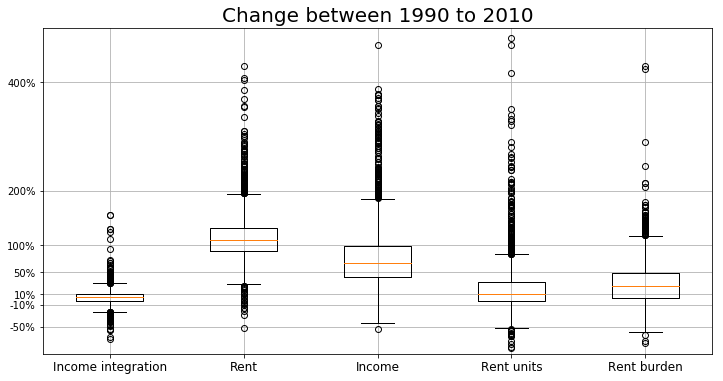

In [10]:
num = range(df_change.shape[1])

plt.figure(figsize = (12, 6))
plt.boxplot([df_change.iloc[:,i] for i in num])
plt.ylim(-1,5)
plt.xticks([i+1 for i in num], 
           ('Income integration', 'Rent', 'Income', 'Rent units', 'Rent burden'),
          fontsize = 12)
plt.title('Change between 1990 to 2010', fontsize = 20)
plt.yticks((-0.5,-0.1,0.1,0.5,1,2,4), ('-50%', '-10%', '10%', '50%', '100%', '200%', '400%'))
plt.grid()
plt.show()

In [11]:
df_change1 = pd.DataFrame()
df_change1['entropy_9_0'] = df_census.entropy_index_0 / df_census.entropy_index_9 -1
df_change1['rent_9_0'] = df_census.rent_0 / df_census.rent_9 -1
df_change1['inc_9_0'] = df_census.inc_0 / df_census.inc_9 -1
df_change1['rent_units_9_0'] = df_census.r_units_0 / df_census.r_units_9 -1
df_change1['rent_burden_9_0'] = df_census.ratio_rent_inc_0 / df_census.ratio_rent_inc_9 -1

In [12]:
df_change2 = pd.DataFrame()
df_change2['entropy_0_1'] = df_census.entropy_index_1 / df_census.entropy_index_0 -1
df_change2['rent_0_1'] = df_census.rent_1 / df_census.rent_0 -1
df_change2['inc_0_1'] = df_census.inc_1 / df_census.inc_0 -1
df_change2['rent_units_0_1'] = df_census.r_units_1 / df_census.r_units_0 -1
df_change2['rent_burden_0_1'] = df_census.ratio_rent_inc_1 / df_census.ratio_rent_inc_0 -1

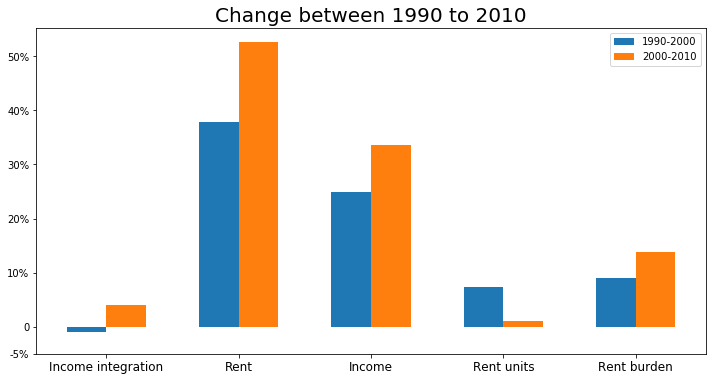

In [13]:
plt.figure(figsize = (12, 6))
plt.bar([i-0.15 for i in num], [df_change1.iloc[:,i].median() for i in num], 
        width = 0.3, label = '1990-2000')
plt.bar([i+0.15 for i in num], [df_change2.iloc[:,i].median() for i in num], 
        width = 0.3, label = '2000-2010')
plt.xticks([i for i in num], 
           ('Income integration', 'Rent', 'Income', 'Rent units', 'Rent burden'),
          fontsize = 12)
plt.yticks((-0.05,0, 0.1,0.2,0.3, 0.4,0.5), ('-5%', '0', '10%', '20%', '30%','40%','50%'))
plt.title('Change between 1990 to 2010', fontsize = 20)
plt.legend()
plt.show()

# 3. Combine and normalized the data

In [14]:
df1 = pd.concat([df_census, df_change1, df_change2], axis = 1)
df1.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,...,entropy_9_0,rent_9_0,inc_9_0,rent_units_9_0,rent_burden_9_0,entropy_0_1,rent_0_1,inc_0_1,rent_units_0_1,rent_burden_0_1
0,36005000200,0.867149,0.857971,0.921479,38711,742,50817,730,58368,1273,...,-0.010583,-0.016173,0.312728,0.096354,-0.250547,0.074021,0.743836,0.148592,0.508314,0.518238
1,36005000400,0.919819,0.923299,0.943208,40484,535,41019,643,73148,1330,...,0.003783,0.201869,0.013215,1.271028,0.186193,0.021563,1.068429,0.783271,0.265432,0.159907
2,36005001600,0.908063,0.925875,0.862742,24732,466,30104,558,33555,823,...,0.019616,0.197425,0.217208,0.037620,-0.016253,-0.068188,0.474910,0.114636,0.065920,0.323222
3,36005001900,0.652853,0.830158,0.672415,24823,422,23671,461,25489,870,...,0.271585,0.092417,-0.046409,-0.058824,0.145582,-0.190016,0.887202,0.076803,0.502976,0.752597
4,36005002000,0.814774,0.779722,0.804094,18762,298,19694,266,30817,455,...,-0.043021,-0.107383,0.049675,0.012062,-0.149625,0.031258,0.710526,0.564791,0.006536,0.093134


In [15]:
df1.shape

(2077, 26)

## Normalized

In [16]:
def normalize(x):
    norm = (x - x.min())/(x.max() - x.min())
    return norm

In [17]:
df_normed0 = pd.DataFrame()
df_normed0['tract'] = df1['tract']

for i in range(1, df1.shape[1]):
    df_normed0[df1.columns[i]] = normalize(df1.iloc[:,i])


df_normed0.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,...,entropy_9_0,rent_9_0,inc_9_0,rent_units_9_0,rent_burden_9_0,entropy_0_1,rent_0_1,inc_0_1,rent_units_0_1,rent_burden_0_1
0,36005000200,0.853692,0.846120,0.906283,0.232493,0.687952,0.215267,0.296235,0.206354,0.588701,...,0.210271,0.091639,0.078659,0.091080,0.265741,0.364669,0.331641,0.233916,0.013994,0.321608
1,36005000400,0.920498,0.928015,0.932628,0.244721,0.438554,0.163728,0.248062,0.267565,0.620904,...,0.215151,0.147213,0.042691,0.225133,0.484406,0.340919,0.407598,0.392235,0.011502,0.229470
2,36005001600,0.905587,0.931245,0.835068,0.136088,0.355422,0.106313,0.200997,0.103591,0.334463,...,0.220528,0.146081,0.067188,0.084377,0.383046,0.300285,0.268711,0.225446,0.009456,0.271464
3,36005001900,0.581888,0.811254,0.604311,0.136715,0.302410,0.072475,0.147287,0.070186,0.361017,...,0.306101,0.119317,0.035530,0.073371,0.464073,0.245128,0.365190,0.216009,0.013939,0.381870
4,36005002000,0.787263,0.748026,0.763963,0.094916,0.153012,0.051555,0.039313,0.092252,0.126554,...,0.199255,0.068392,0.047069,0.081461,0.316270,0.345308,0.323847,0.337736,0.008846,0.212301


In [18]:
df_normed0.shape

(2077, 26)

In [19]:
df_normed0.to_csv('civic_census_normed.csv')

# Drop outliers and Normalized

In [20]:
def outlier(x):
    outlier = np.mean(x) + 3 * np.std(x)
    return outlier

In [21]:
a = np.ones(df1.shape[0])
for i in range(df1.shape[1]):
    a0 = df1.iloc[:,i] < outlier(df1.iloc[:,i])
    a = a0 * a
        
df2 = df1[[bool(i) for i in a]]
df2.shape

(1770, 26)

In [22]:
df_normed = pd.DataFrame()
df_normed['tract'] = df2['tract']

for i in range(1, df2.shape[1]):
    df_normed[df2.columns[i]] = normalize(df2.iloc[:,i])


df_normed.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,...,entropy_9_0,rent_9_0,inc_9_0,rent_units_9_0,rent_burden_9_0,entropy_0_1,rent_0_1,inc_0_1,rent_units_0_1,rent_burden_0_1
0,36005000200,0.793073,0.781640,0.905241,0.377683,0.711970,0.324224,0.437449,0.277105,0.572770,...,0.464519,0.226547,0.388886,0.384006,0.170053,0.633739,0.710826,0.326530,0.192816,0.649818
1,36005000400,0.887558,0.897852,0.931879,0.399758,0.453865,0.243885,0.366312,0.362769,0.606221,...,0.482413,0.383516,0.211059,0.949193,0.489531,0.588810,0.873628,0.656091,0.158484,0.463651
2,36005001600,0.866469,0.902434,0.833235,0.203633,0.367830,0.154388,0.296811,0.133290,0.308685,...,0.502133,0.380317,0.332174,0.355746,0.341440,0.511940,0.575944,0.308898,0.130283,0.548499
3,36005001900,0.408653,0.732163,0.599914,0.204766,0.312968,0.101641,0.217498,0.086539,0.336268,...,0.815966,0.304721,0.175660,0.309343,0.459824,0.407595,0.782732,0.289253,0.192062,0.771578
4,36005002000,0.699120,0.642441,0.761340,0.129302,0.158354,0.069031,0.058054,0.117420,0.092723,...,0.424117,0.160885,0.232706,0.343449,0.243878,0.597114,0.694119,0.542644,0.121889,0.428959


In [23]:
df_normed.to_csv('civic_census_normed_dropoutliers.csv')

# 4. Analysis for rent growth

## Use the data of 1990 and change data of 1990-2000 to be train set
## Use the data of 2000 and change data of 2000-2010 to be test set

In [24]:
columns = ['inc', 'rent', 'entropy', 'units', 
           'inc_change', 'entropy_change','units_change', 'rent_change']

In [25]:
train = pd.concat([df_normed.inc_9, df_normed.rent_9, df_normed.entropy_index_9, 
                   df_normed.r_units_9,
                  df_normed.inc_9_0, df_normed.entropy_9_0, df_normed.rent_units_9_0,
                  df_normed.rent_9_0], axis = 1)
train.columns = columns

In [26]:
test = pd.concat([df_normed.inc_0, df_normed.rent_0, df_normed.entropy_index_0, 
                   df_normed.r_units_0,
                  df_normed.inc_0_1, df_normed.entropy_0_1, df_normed.rent_units_0_1,
                  df_normed.rent_0_1], axis = 1)
test.columns = columns

In [27]:
train.shape, test.shape

((1770, 8), (1770, 8))

In [28]:
train.describe()

,inc,rent,entropy,units,inc_change,entropy_change,units_change,rent_change
count,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000
mean,0.345435,0.456501,0.744915,0.244249,0.354768,0.471086,0.395493,0.501524
std,0.167771,0.164215,0.165320,0.188100,0.143212,0.120521,0.109776,0.125795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221478,0.362843,0.645104,0.098950,0.257861,0.406323,0.334385,0.429386
50%,0.344209,0.448878,0.789866,0.196932,0.337636,0.466949,0.372814,0.501468
75%,0.461013,0.559850,0.869258,0.336926,0.430760,0.532481,0.432716,0.570857
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
test.describe()

,inc,rent,entropy,units,inc_change,entropy_change,units_change,rent_change
count,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000
mean,0.275526,0.434808,0.736447,0.259952,0.438129,0.607738,0.129586,0.608756
std,0.151900,0.137582,0.169541,0.188245,0.153185,0.098964,0.046213,0.107977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.164697,0.375307,0.650487,0.114268,0.331548,0.553448,0.112340,0.546473
50%,0.252663,0.443990,0.781141,0.215488,0.422468,0.604000,0.122917,0.600609
75%,0.366722,0.507768,0.861088,0.355920,0.520698,0.657985,0.137560,0.661503
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
model = smf.ols('rent_change ~ '+ '+'.join(train.columns[:-1]) ,train).fit()
model_1 = smf.ols('rent_change ~ '+ '+'.join(test.columns[:-1]) ,test).fit()

In [31]:
total = pd.concat([train,test], axis = 0)
total.shape

(3540, 8)

In [32]:
model_2 = smf.ols('rent_change ~ '+ '+'.join(total.columns[:-1]) ,total).fit()

# Multi-regression RESULT
## Do regression during every 10 years

## 1990-2000 regression result

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_change   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     103.4
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          7.47e-127
Time:                        19:29:42   Log-Likelihood:                 1462.8
No. Observations:                1770   AIC:                            -2910.
Df Residuals:                    1762   BIC:                            -2866.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.2291      0.031      7.401      0.000         0.168     0.290
inc                0.4527      0.024     18.512      0.000         0.405     0.501
rent              -0.4755      0.024    -19.669      0.000        -0.523    -0.428
entropy            0.2097      0.019     11.156      0.000         0.173     0.247
units              0.1170      0.016      7.270      0.000         0.085     0.149
inc_change         0.2817      0.019     14.678      0.000         0.244     0.319
entropy_change     0.1095      0.025      4.402      0.000         0.061     0.158
units_change      -0.0080      0.025     -0.313      0.754        -0.058     0.042
==============================================================================
Omnibus:                       84.883   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.312
Skew:                           0.052   Prob(JB):                     2.48e-63
Kurtosis:                       4.974   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2000-2010 regression result

In [34]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_change   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     16.28
Date:                Wed, 29 Nov 2017   Prob (F-statistic):           6.92e-21
Time:                        19:29:42   Log-Likelihood:                 1484.2
No. Observations:                1770   AIC:                            -2952.
Df Residuals:                    1762   BIC:                            -2909.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.5718      0.030     19.242      0.000         0.514     0.630
inc                0.0826      0.032      2.618      0.009         0.021     0.144
rent              -0.1784      0.029     -6.226      0.000        -0.235    -0.122
entropy            0.0215      0.019      1.125      0.261        -0.016     0.059
units             -0.0046      0.015     -0.309      0.757        -0.034     0.024
inc_change         0.1259      0.017      7.519      0.000         0.093     0.159
entropy_change     0.0017      0.030      0.056      0.955        -0.057     0.061
units_change       0.1612      0.055      2.912      0.004         0.053     0.270
==============================================================================
Omnibus:                       80.193   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.660
Skew:                           0.044   Prob(JB):                     1.52e-57
Kurtosis:                       4.882   Cond. No.                         35.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1990-2000 + 2000-2010  regression result

In [35]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_change   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     189.8
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          1.89e-239
Time:                        19:29:42   Log-Likelihood:                 2795.3
No. Observations:                3540   AIC:                            -5575.
Df Residuals:                    3532   BIC:                            -5525.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.4415      0.022     20.097      0.000         0.398     0.485
inc                0.2669      0.019     14.094      0.000         0.230     0.304
rent              -0.3365      0.019    -17.941      0.000        -0.373    -0.300
entropy            0.1284      0.014      9.400      0.000         0.102     0.155
units              0.0316      0.011      2.846      0.004         0.010     0.053
inc_change         0.2108      0.013     16.189      0.000         0.185     0.236
entropy_change     0.1094      0.017      6.254      0.000         0.075     0.144
units_change      -0.2469      0.014    -17.664      0.000        -0.274    -0.219
==============================================================================
Omnibus:                      150.022   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.255
Skew:                           0.077   Prob(JB):                    2.83e-103
Kurtosis:                       4.783   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## use the first 10 years to test latter 10 years

In [36]:
train.head(2)

,inc,rent,entropy,units,inc_change,entropy_change,units_change,rent_change
0,0.377683,0.711970,0.793073,0.105030,0.388886,0.464519,0.384006,0.226547
1,0.399758,0.453865,0.887558,0.058043,0.211059,0.482413,0.949193,0.383516


In [37]:
test.head(2)

,inc,rent,entropy,units,inc_change,entropy_change,units_change,rent_change
0,0.324224,0.437449,0.781640,0.115600,0.326530,0.633739,0.192816,0.710826
1,0.243885,0.366312,0.897852,0.133838,0.656091,0.588810,0.158484,0.873628


In [38]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [39]:
def modelEval(lm, test = test, key = 'Y'):
    lmy = lm.predict(test)
    y_err = lmy - test[key]
    y_norm = test[key]-np.mean(test[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)


In [40]:
R_2_IS_OLS = model.rsquared
R_2_OS_OLS = modelEval(model, key = 'rent_change')
OLS_coef = model.params

R_2_IS_OLS, R_2_OS_OLS

(0.29109681422116174, -0.75516345107303806)

### out-of-sample R2 is less than 0. this model sucks.

### Try Ridge 

In [41]:
def modelEval2(lm, X_test = X_test, y_test = y_test):
    y_err = lm.predict(X_test) - y_test
    y_norm = y_test - np.mean(y_test)
    Rsquared = 1- y_err.dot(y_err)/y_norm.dot(y_norm)
    return Rsquared

In [42]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train,y_train,lambdas):
    R_2_OS=[]
    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train,y_train)  
        R_2_OS_ = modelEval2(lm, X_test, y_test)
        R_2_OS.append(R_2_OS_)
        
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    return best_lambda

In [43]:
#select best lambda for Ridge
lambdas = np.exp(np.linspace(-5,10,200))
lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))

Optimal lambda for Ridge=10.880091739883493


In [44]:
Ridge = linear_model.Ridge(fit_intercept=True,alpha=lambda_r_optimal)

Ridge.fit(X_train,y_train)

Ridge_coef=Ridge.coef_
R_2_IS_Ridge = modelEval2(Ridge, X_train, y_train)
R_2_OS_Ridge = modelEval2(Ridge, X_test, y_test)

print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.2375039057238466
The R-squared we found for OS Ridge is: -0.6459548019596497


In [45]:
#let's look at the final coefficients
name=list(OLS_coef.index)[1:]

result=[name, np.ndarray.tolist(np.asarray(OLS_coef[1:])),
        np.ndarray.tolist(Ridge_coef)] 

temp=pd.DataFrame(result).T

R2_IS=pd.DataFrame(['R2_train',R_2_IS_OLS, R_2_IS_Ridge]).T 
R2_OS=pd.DataFrame(['R2_test',R_2_OS_OLS, R_2_OS_Ridge]).T 


temp=temp.append([R2_IS, R2_OS])
result=temp

result.columns=['','OLS','Ridge'] 
result.set_index('')

,OLS,Ridge
,,
inc,0.452736,0.199635
rent,-0.475543,-0.24822
entropy,0.209668,0.0885395
units,0.117003,0.102729
inc_change,0.281725,0.164327
entropy_change,0.109479,0.0122442
units_change,-0.00797249,-0.0458599
R2_train,0.291097,0.237504
R2_test,-0.755163,-0.645955


## Ridge regression does not get a better result than OLS

# Use 20 years data together to do train and test

In [46]:
from sklearn.model_selection import train_test_split
train2, test2  = train_test_split(total, test_size = 0.3)

X_train2 = train2.iloc[:,:-1]
y_train2 = train2.iloc[:,-1]
X_test2 = test2.iloc[:,:-1]
y_test2 = test2.iloc[:,-1]
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((2478, 7), (2478,), (1062, 7), (1062,))

In [47]:
model2 = smf.ols('rent_change ~ '+ '+'.join(X_train2.columns) ,train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_change   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     130.9
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          3.68e-164
Time:                        19:29:43   Log-Likelihood:                 1964.4
No. Observations:                2478   AIC:                            -3913.
Df Residuals:                    2470   BIC:                            -3866.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.4226      0.026     16.098      0.000         0.371     0.474
inc                0.2642      0.023     11.404      0.000         0.219     0.310
rent              -0.3313      0.023    -14.483      0.000        -0.376    -0.286
entropy            0.1358      0.017      8.213      0.000         0.103     0.168
units              0.0427      0.013      3.190      0.001         0.016     0.069
inc_change         0.2150      0.016     13.865      0.000         0.185     0.245
entropy_change     0.1190      0.021      5.700      0.000         0.078     0.160
units_change      -0.2434      0.017    -14.336      0.000        -0.277    -0.210
==============================================================================
Omnibus:                      107.997   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.139
Skew:                           0.005   Prob(JB):                     2.07e-77
Kurtosis:                       4.849   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
OLS_coef2 = model2.params
R_2_IS_OLS2 = model2.rsquared
R_2_OS_OLS2 = modelEval(model2, test = test2, key = 'rent_change')
R_2_IS_OLS2, R_2_OS_OLS2

(0.27058458927185713, 0.27785710930634711)

In [49]:
lambdas = np.exp(np.linspace(-5,10,200))
lambda_r_optimal2 = Regularization_fit_lambda(1,X_train2,y_train2,lambdas)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal2))


Optimal lambda for Ridge=10.880091739883493


In [50]:
Ridge2 = linear_model.Ridge(fit_intercept=True,alpha=lambda_r_optimal2)

Ridge2.fit(X_train2,y_train2)

Ridge_coef2 = Ridge2.coef_
R_2_IS_Ridge2 = modelEval2(Ridge2, X_train2, y_train2)
R_2_OS_Ridge2 = modelEval2(Ridge2, X_test2, y_test2)

print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge2))
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge2))

The R-squared we found for IS Ridge is: 0.252825243595188
The R-squared we found for OS Ridge is: 0.25774102031446056


In [52]:
name=list(OLS_coef2.index)[1:] 

result = [name, np.ndarray.tolist(np.asarray(OLS_coef2[1:])),
        np.ndarray.tolist(Ridge_coef2)]
temp = pd.DataFrame(result).T
R2_IS2 = pd.DataFrame(['R2_train', R_2_IS_OLS2, R_2_IS_Ridge2]).T 
R2_OS2 = pd.DataFrame(['R2_test', R_2_OS_OLS2, R_2_OS_Ridge2]).T 

temp = temp.append([R2_IS2, R2_OS2])
result = temp
result.columns=['','OLS2','Ridge2']
result.set_index('')

,OLS2,Ridge2
,,
inc,0.264224,0.110507
rent,-0.331259,-0.187654
entropy,0.135835,0.0662357
units,0.0426687,0.0404472
inc_change,0.214983,0.162225
entropy_change,0.119038,0.0821527
units_change,-0.243373,-0.213986
R2_train,0.270585,0.252825
R2_test,0.277857,0.257741


# Multi-linear regression analysis conclusion

### Fomular: Rent change ~ Rent + Income + Income change + entropy index + entropy index change + rent units + rent units change

#### Data prepared: normalized 

### Regression results explanation:
- Rsquared of 1990-2000, and 1990-2000 + 2000-2010 total , is between **0.27-0.3**. However, 2000-2010's Rsquared is pretty low, roughly 0.06. It means that the rent growth are less related to the income, entropy index and number of renter units than before. (**Is that because the rent market has faced more governmental interference recently, like rent control,  rent stabilization, inclusionary zoning programs, public housing, etc.? **)



- **Income, rent, and income change are always the primary factors** influencing the rent growth.


- Rent has the main negative effect on rent growth. Higher rent, slower rent growth, which is obvious.


- The number change of rent units also has negative influence on rent growth between 1990-2000, but not statistically significant(p>0.7).

- Entropy index, entropy index change, as well as the number of rent units are not statistically significant in 2000-2010(p>0.2, 0.9, 0.7).

- Generally, **it's hard to find relationship between rent growth with either entropy index, or entropy index change(the coef efficiencies are small)**. They have weak positive corelation with rent growth between 1990-2000, but nearly no corelation relationship between 2000-2010.

### Train-test results:
- The result is awful if use 1990-2000 model to predict 2000-2010 rent growth. Test Rsquared is negative.

- For the dataset of 1990-2000 + 2000-2010 total, if splited into train-test set, the Rsquared for train and test are both about 0.27. 

